In [1]:
using DelimitedFiles
using LaTeXStrings
using LinearAlgebra
using Plots
using PyCall
using Random
sk = pyimport("sklearn.datasets")

PyObject <module 'sklearn.datasets' from 'C:\\Users\\danie\\.julia\\conda\\3\\lib\\site-packages\\sklearn\\datasets\\__init__.py'>

In [2]:
X, y = sk.load_breast_cancer("data")
println(size(X))

#data = readdlm("ex2data1.txt", ',', Float64)
#X = data[:, 1:2]
#y = data[:, 3];

(

C:\Users\danie\.julia\conda\3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass return_X_y=data as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


569, 30)


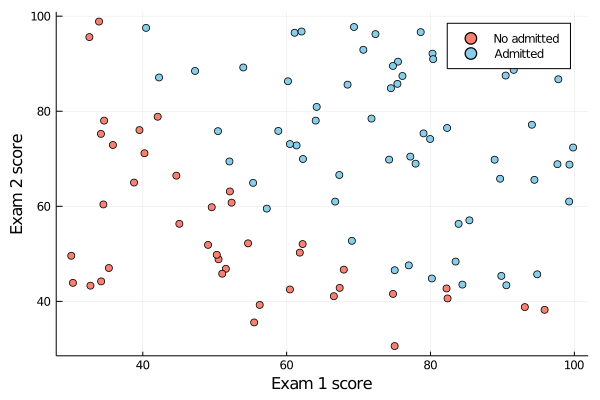

In [3]:
function PlotData(data, label, label2, axis1, axis2)
    a = filter(i -> data[i, 3]==0, 1:size(data)[1])
    b = filter(i -> data[i, 3]==1, 1:size(data)[1])
    class1 = data[a, 1:2]
    class2 = data[b, 1:2]
    scatter(class1[:, 1], class1[:, 2], color="salmon", 
        label=label,
        xlabel=axis1,
        ylabel=axis2)
    scatter!(class2[:, 1], class2[:, 2], color="skyblue",
        label=label2)
end

PlotData(data, "No admitted", "Admitted", "Exam 1 score", "Exam 2 score")

In [3]:
function prepare(X) 
    ones = transpose([1 for i in 1 : size(X)[1]])
    Xt = [ones; transpose(X)]
    X = transpose(Xt)
    return X
end

function ∇J(X, y, η)
    X' * (η - y)
end

function sigmoid(X, θ)
    h(z) = 1/(1 + ℯ^(-z))
    Z = X * θ
    η = map(z->h(z), Z)
    return η
end

sigmoid (generic function with 1 method)

In [4]:
function gradient_descent(X, y, α, ϵ, n_iter)
    
    X = [ones(size(X)[1]) X]
    θ = rand(size(X)[2])*5
    η = sigmoid(X, θ)
    m = size(X)[1]
    
    i = 0
    while norm(∇J(X, y, η)) > ϵ && i < n_iter
        η = sigmoid(X, θ)
        θ -= (α\m) * ∇J(X, y, η)
        i += 1
    end
    return θ
end

gradient_descent (generic function with 1 method)

In [5]:
Θ = gradient_descent(X, y, 0.03, 1e-4, 1000000)

η = sigmoid(prepare(X), Θ)
counter = [if y[i] == η[i] true else false end for i in 1:length(η)]
println(count(counter))

println(Θ)

533
[2.1316162504579556e10, 1.414086917556724e11, 2.178253007666278e10, 8.608583516394469e10, -4.144383572794473e9, -5.403123084602426e9, -2.3776242235864544e10, -3.3536375012677002e10, -1.4447703772184622e10, -8.060404726064392e9, -1.674023547029535e9, 5.18632936202896e9, 5.428203330163017e10, 1.1996473998408651e9, -1.792720223458793e10, -5.826173968174525e8, -4.411894715381892e9, -6.730461704545692e9, -1.8904704499440463e9, -2.024875343332676e9, -3.9581788194089246e8, 1.4733486969586285e11, -5.7303309284874855e10, -6.089063559935143e10, -1.6957110353769002e9, -1.0074016194441046e10, -7.091393176436926e10, -8.906328235847752e10, -2.7687208241753323e10, -2.4841777415777157e10, -6.885082159544682e9]


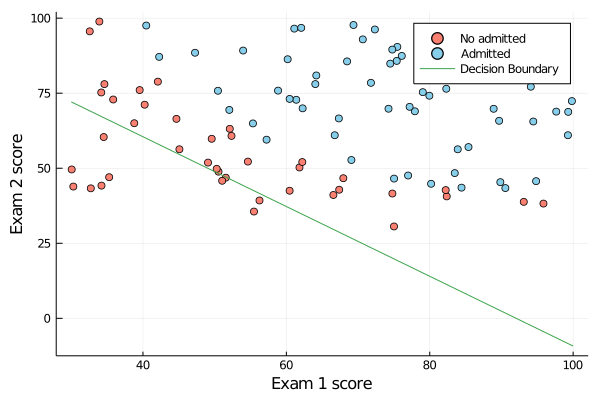

In [7]:
f(x) = -(Θ'[1] + Θ'[2]x)/Θ'[3]
PlotData(data, "No admitted", "Admitted", "Exam 1 score", "Exam 2 score")
plot!(f, 30, 100, label="Decision Boundary")

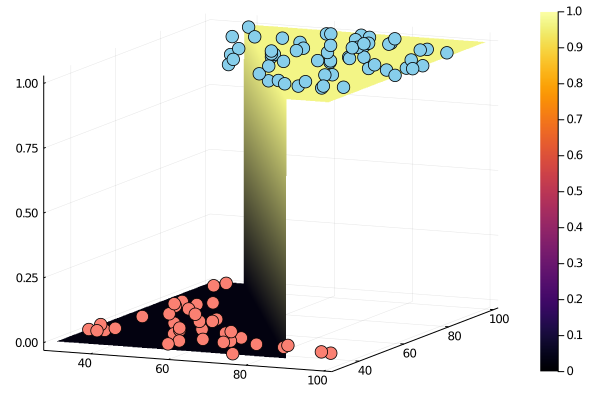

In [8]:
x= [30.0:0.1:100.0;]; y= [30.0:0.1:100.0;]; h(x,y)= 1/(1 + ℯ^-(-1.579259999551389e9 + 1.4217833066220406e7x + 1.0417104819062546e7y));
surface( x, y, h)
a = filter(i -> data[i, 3]==0, 1:size(data)[1])
b = filter(i -> data[i, 3]==1, 1:size(data)[1])
class1 = data[a, :]
class2 = data[b, :]
plot!(class1[:,1], class1[:,2], class1[:,3],
     seriestype=:scatter, markersize = 7, color="salmon", label="")
plot!(class2[:,1], class2[:,2], class2[:,3],
     seriestype=:scatter, markersize = 7, color="skyblue", label="")

## Parte 2

(118, 2)


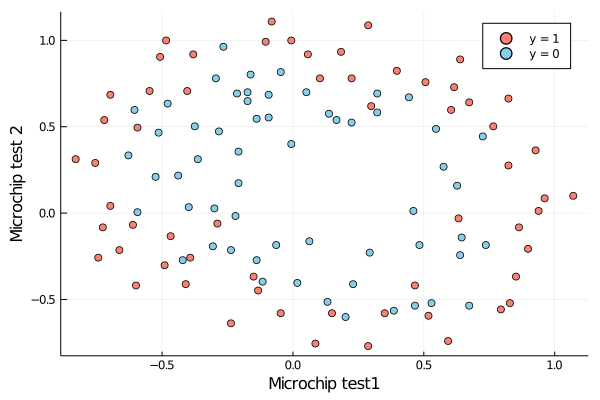

In [9]:
data = readdlm("ex2data2.txt", ',', Float64)
X = data[:, 1:2]
y = data[:, 3]
println(size(X))
PlotData(data, "y = 1", "y = 0",
    "Microchip test1", "Microchip test 2")

In [10]:
function costFunctionReg(X, y, θ, λ)
    X = prepare(X)
    η = sigmoid(X, θ)
    j = [y[i]*log(η[i]) + (1 - y[i])*log(1 - η[i]) for i in 1:length(y)]
    m = length(y)
    aux = [i^2 for i in θ]
    return -(1/m) * sum(j) + (λ/m)*sum(aux)
end

costFunctionReg(X, y, [0, 0, 0], 0)

0.6931471805599453

In [11]:
function gradient_descent_reg(X, y, α, λ, ϵ, n_iter)
    
    X = prepare(X) 
    θ = rand(size(X)[2])*5
    η = sigmoid(X, θ)
    m = size(X)[1]
    
    i = 0
    while norm(∇J(X, y, η)) > ϵ && i < n_iter
        η = sigmoid(X, θ)
        θ = θ - (α\m) * (∇J(X, y, η) + λ*θ)
        i += 1
    end
    return θ
end

gradient_descent_reg (generic function with 1 method)

In [12]:
x² = [X[i, 1]^2 for i in 1:size(X)[1]]
y² = [X[i, 2]^2 for i in 1:size(X)[1]]
xy = [X[i, 1] * X[i, 2] for i in 1:size(X)[1]]
X = [X x² y² xy];

In [13]:
Θ = gradient_descent(X, y, 0.02, 1e-2, 100000);

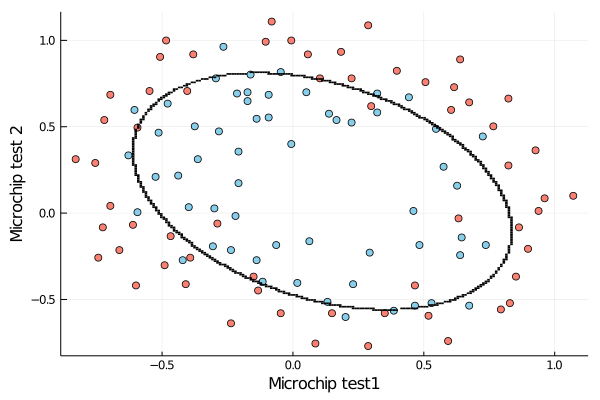

In [14]:
using ImplicitEquations, Plots
PlotData(data, "y = 1", "y = 0",
    "Microchip test1", "Microchip test 2")
f(x,y) = Θ[1] + Θ[2]*x + Θ[3]*y + Θ[4]*x^2 + Θ[5]*y^2 + Θ[6]*x*y
plot!(f ⩵ 0)